**Jiayang's Part**

**Question:**
```
Who are the top funders of racial justice programs in Massachusetts? 
```
```
Through searching of candid. website, I think Ethnic and racial minority rights under subject class indicate the programs that aim to support racial justice. The subject code of that is SR040200, therefore my plan is to filter with this code to find the grants that were made specifically for the racial justice program. Also, I will filter the grantmaker state to be only in MA.

After the described process it shows that there are only 5 funders that supported this program. The 5 founders and their grant amounts are shown in the graph below.
```

Ranked Funders based on Appearance in Top Tens:
1. The Boston Foundation: 6 appearances
2. Nellie Mae Education Foundation Inc.: 5 appearances
3. Barr Foundation: 5 appearances
4. Boston Celtics Shamrock Foundation Inc: 3 appearances
5. Greater Worcester Community Foundation, Inc.: 3 appearances
6. Fidelity Investments Charitable Gift Fund: 3 appearances
7. Masshire Hampden County Workforce Board, Inc.: 3 appearances
8. United Way of Massachusetts Bay, Inc.: 3 appearances
9. Preparatory Foundation Inc: 3 appearances
10. Liberty Mutual Foundation Inc: 3 appearances
11. Combined Jewish Philanthropies of Greater Boston, Inc.: 2 appearances
12. The Elsie Procter Van Buren Foundation: 2 appearances
13. Trustees of Boston University: 2 appearances
14. Franklin Square House Foundation Inc: 2 appearances
15. Health Resources in Action: 2 appearances
16. RIZE Massachusetts Foundation, Inc.: 2 appearances
17. Oneworld Boston Inc: 2 appearances
18. Eastern Bank Foundation F/k/a Eastern Bank Chari

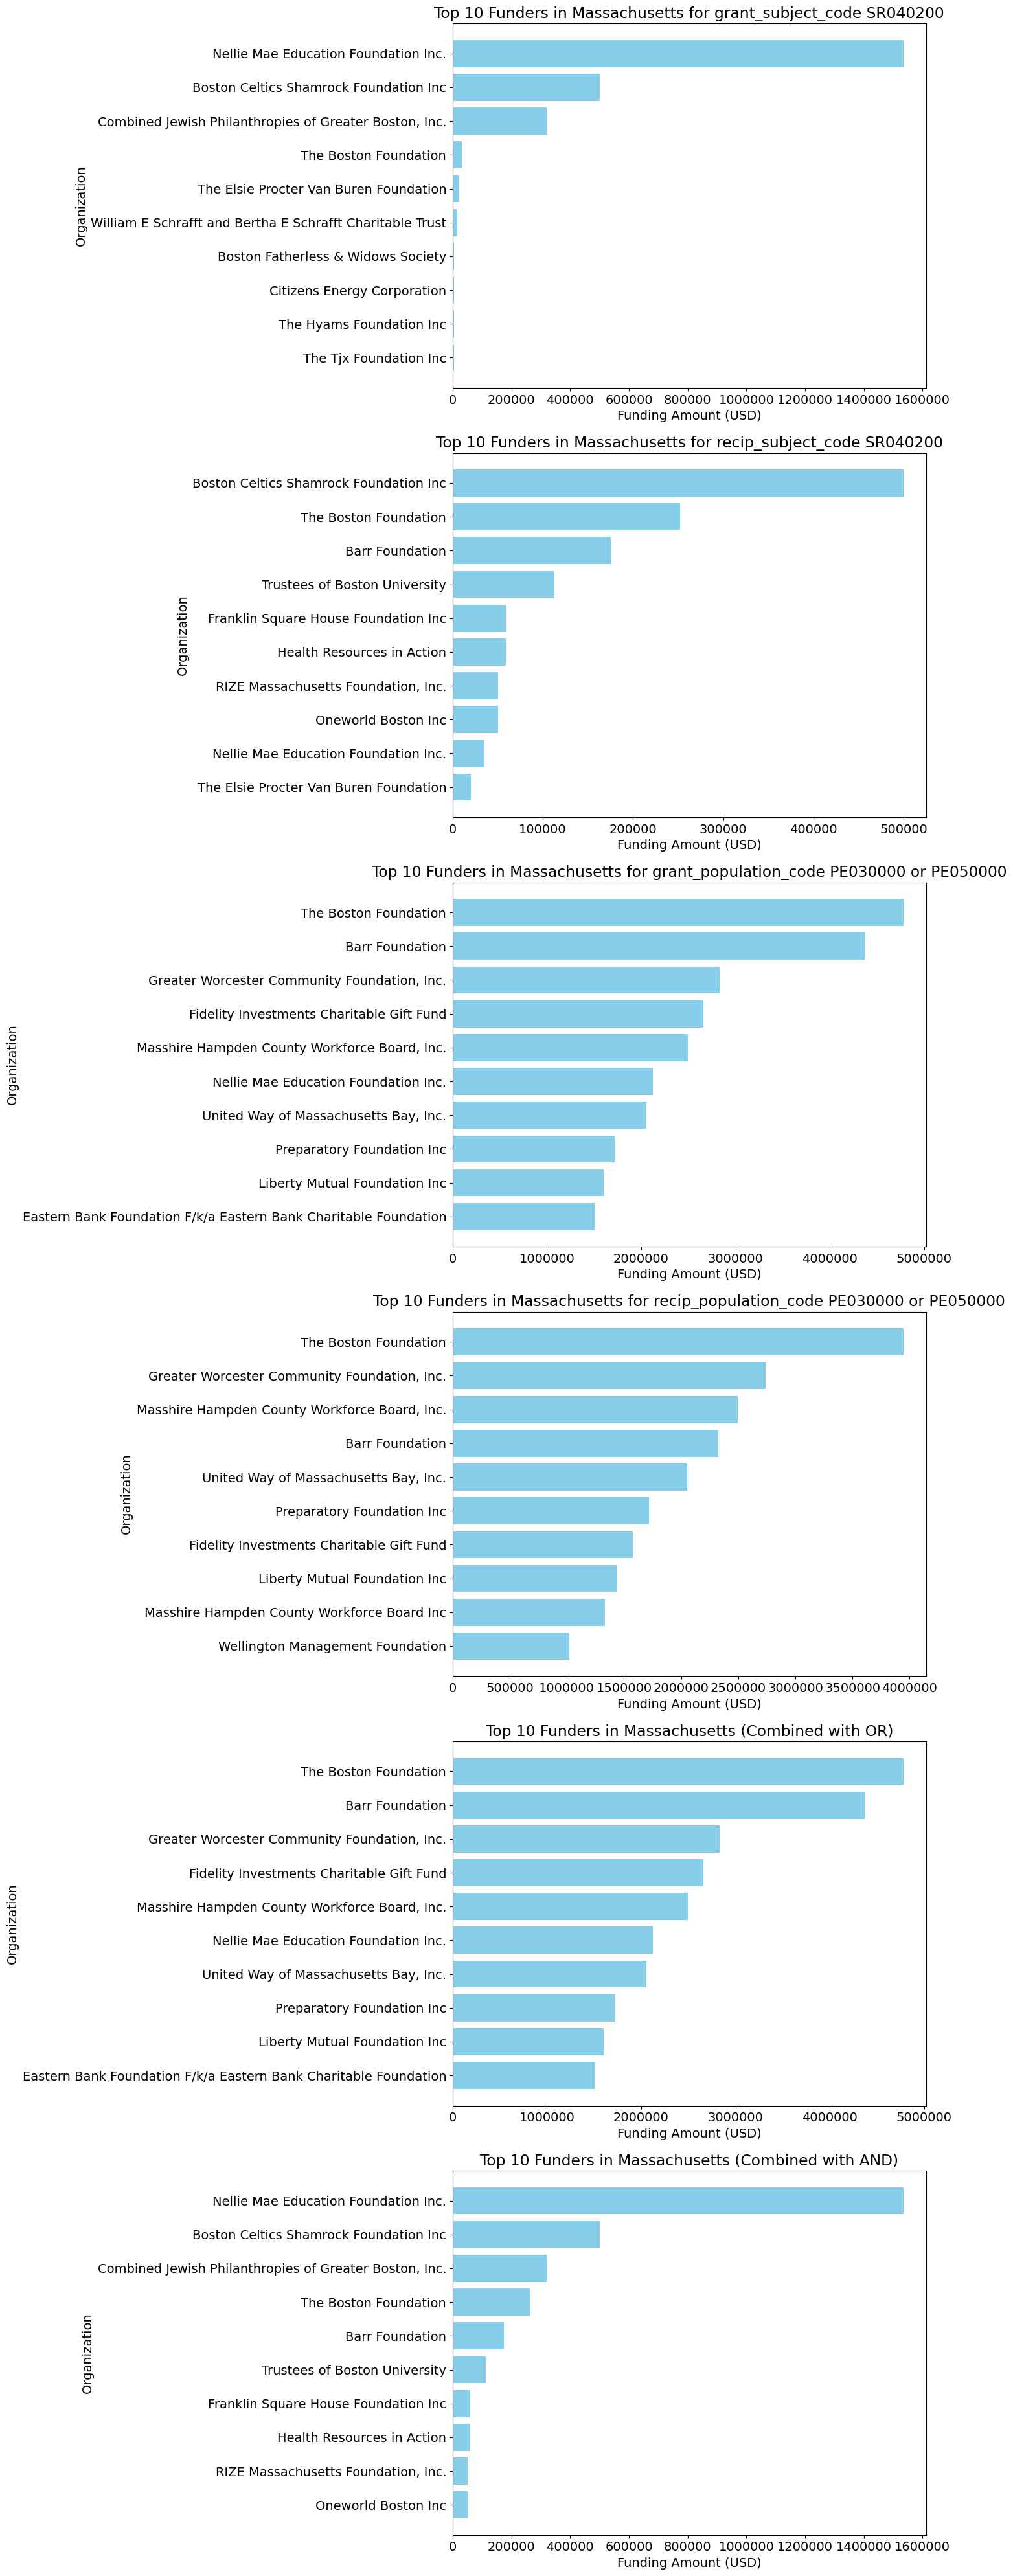

Funders appeared in all top tens: {'The Boston Foundation'}


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
  
grants_df = pd.read_csv('../../Data/Grants.csv', low_memory=False)

# 1. Check if grant_subject_code contains the specified code
filtered_grants_1 = grants_df[grants_df['grant_subject_code'].str.contains('SR040200') & (grants_df['gm_state'] == 'MA')]

# 2. Check if recip_subject_code contains the specified code
filtered_grants_2 = grants_df[grants_df['recip_subject_code'].str.contains('SR040200') & (grants_df['gm_state'] == 'MA')]

# 3. Check if grant_population_code contains PE030000 or PE050000
filtered_grants_3 = grants_df[grants_df['grant_population_code'].str.contains('PE030000|PE050000') & (grants_df['gm_state'] == 'MA')]

# 4. Check if recip_population_code contains PE030000 or PE050000
filtered_grants_4 = grants_df[grants_df['recip_population_code'].str.contains('PE030000|PE050000') & (grants_df['gm_state'] == 'MA')]

# Group by organization and sum funding amount
funding_by_organization_1 = filtered_grants_1.groupby('gm_name')['amount_usd'].sum().reset_index()
funding_by_organization_2 = filtered_grants_2.groupby('gm_name')['amount_usd'].sum().reset_index()
funding_by_organization_3 = filtered_grants_3.groupby('gm_name')['amount_usd'].sum().reset_index()
funding_by_organization_4 = filtered_grants_4.groupby('gm_name')['amount_usd'].sum().reset_index()

# Combine filters with "or" logic
filtered_grants_or = pd.concat([filtered_grants_1, filtered_grants_2, filtered_grants_3, filtered_grants_4]).drop_duplicates()

# Combine filters with "and" logic
filtered_grants_and = grants_df[
    ((grants_df['grant_subject_code'].str.contains('SR040200')) | (grants_df['recip_subject_code'].str.contains('SR040200'))) &
    ((grants_df['grant_population_code'].str.contains('PE030000|PE050000')) | (grants_df['recip_population_code'].str.contains('PE030000|PE050000'))) &
    (grants_df['gm_state'] == 'MA')
]

# Get top funders for each case
top_funders_1 = funding_by_organization_1.sort_values('amount_usd', ascending=False).head(10)
top_funders_2 = funding_by_organization_2.sort_values('amount_usd', ascending=False).head(10)
top_funders_3 = funding_by_organization_3.sort_values('amount_usd', ascending=False).head(10)
top_funders_4 = funding_by_organization_4.sort_values('amount_usd', ascending=False).head(10)

# Get top funders for "or" filter
funding_by_organization_or = filtered_grants_or.groupby('gm_name')['amount_usd'].sum().reset_index()
top_funders_or = funding_by_organization_or.sort_values('amount_usd', ascending=False).head(10)

# Get top funders for "and" filter
funding_by_organization_and = filtered_grants_and.groupby('gm_name')['amount_usd'].sum().reset_index()
top_funders_and = funding_by_organization_and.sort_values('amount_usd', ascending=False).head(10)

all_top_funders = (
    list(top_funders_1['gm_name']) + 
    list(top_funders_2['gm_name']) + 
    list(top_funders_3['gm_name']) + 
    list(top_funders_4['gm_name']) + 
    list(top_funders_or['gm_name']) + 
    list(top_funders_and['gm_name'])
)

funder_counter = Counter(all_top_funders)

ranked_funders = sorted(funder_counter.items(), key=lambda x: x[1], reverse=True)

print("Ranked Funders based on Appearance in Top Tens:")
for idx, (funder, count) in enumerate(ranked_funders, start=1):
    print(f"{idx}. {funder}: {count} appearances")

plt.rcParams.update({'font.size': 14}) 

plt.figure(figsize=(15, 40))

plt.subplot(6, 1, 1)
plt.barh(top_funders_1['gm_name'], top_funders_1['amount_usd'], color='skyblue')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Organization')
plt.title('Top 10 Funders in Massachusetts for grant_subject_code SR040200')
plt.gca().invert_yaxis()
plt.ticklabel_format(axis='x', style='plain')  # Disable scientific notation for x-axis

plt.subplot(6, 1, 2)
plt.barh(top_funders_2['gm_name'], top_funders_2['amount_usd'], color='skyblue')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Organization')
plt.title('Top 10 Funders in Massachusetts for recip_subject_code SR040200')
plt.gca().invert_yaxis()
plt.ticklabel_format(axis='x', style='plain')  # Disable scientific notation for x-axis

plt.subplot(6, 1, 3)
plt.barh(top_funders_3['gm_name'], top_funders_3['amount_usd'], color='skyblue')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Organization')
plt.title('Top 10 Funders in Massachusetts for grant_population_code PE030000 or PE050000')
plt.gca().invert_yaxis()
plt.ticklabel_format(axis='x', style='plain')  # Disable scientific notation for x-axis

plt.subplot(6, 1, 4)
plt.barh(top_funders_4['gm_name'], top_funders_4['amount_usd'], color='skyblue')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Organization')
plt.title('Top 10 Funders in Massachusetts for recip_population_code PE030000 or PE050000')
plt.gca().invert_yaxis()
plt.ticklabel_format(axis='x', style='plain')  # Disable scientific notation for x-axis

plt.subplot(6, 1, 5)
plt.barh(top_funders_or['gm_name'], top_funders_or['amount_usd'], color='skyblue')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Organization')
plt.title('Top 10 Funders in Massachusetts (Combined with OR)')
plt.gca().invert_yaxis()
plt.ticklabel_format(axis='x', style='plain') 

plt.subplot(6, 1, 6)
plt.barh(top_funders_and['gm_name'], top_funders_and['amount_usd'], color='skyblue')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Organization')
plt.title('Top 10 Funders in Massachusetts (Combined with AND)')
plt.gca().invert_yaxis()
plt.ticklabel_format(axis='x', style='plain') 

plt.tight_layout()

plt.show()
print("Funders appeared in all top tens:", common_funders)